<a href="https://colab.research.google.com/github/LaizaCostaa/previsao_receita_blogxsite_ARIMA/blob/main/previsao_receita_blogxsite_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**ANÁLISE DA RECEITA BLOGXSITE DE UMA EMPRESA DE IMÓVEIS (PARTE II)**

**RESUMO:**

Este projeto foi desenvolvido para auxiliar uma empresa de imóveis nas tomadas de decisões envolvendo o blog da marca. O objetivo dessa análise é entender de que forma esse novo canal influencia na receita da empresa.

**O QUE FAREMOS AQUI?**

Uma análise preditiva da receita do blog e do site para auxiliar na tomada de decisão de negócios, respondendo se vale ou não a pena manter o blog da empresa ativo.


**ONDE ENCONTRAR A ANÁLISE EXPLORATÓRIA?**

Decidi dividir em duas partes porque queria fazer uma análise exploratória mais detalhada e não deixar o código tão poluído com análise e aplicação do modelo ao mesmo tempo.

Código completo da análise exploratória: https://github.com/LaizaCostaa/Case-An-lise-de-faturamento-Blog-x-Site

Artigo da análise exploratória: https://medium.com/@laizamare/an%C3%A1lise-de-s%C3%A9rie-temporal-o-impacto-de-um-canal-de-vendas-nos-neg%C3%B3cios-17215fe96cfe





In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import random
from sklearn.metrics import mean_absolute_error as mae
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [53]:
df = pd.read_csv("df.csv")
df

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,ano_mes,receita_site,receita_blog,taxa_conversao_site,taxa_conversao_blog
0,2019-02-14,1340918,0,12798,0,96579,2019-02-01,9.435606e+05,0.000000e+00,0.132513,NaN
1,2019-03-01,1689589,0,15577,0,97690,2019-03-01,1.148448e+06,0.000000e+00,0.159453,NaN
2,2019-03-06,1688251,0,16212,0,105136,2019-03-01,1.195265e+06,0.000000e+00,0.154200,NaN
3,2019-03-07,1877771,0,17793,0,108032,2019-03-01,1.311828e+06,0.000000e+00,0.164701,NaN
4,2019-03-08,2453247,0,24376,0,109411,2019-03-01,1.797174e+06,0.000000e+00,0.222793,NaN
...,...,...,...,...,...,...,...,...,...,...,...
288,2020-09-24,3648743,2379,22807,11700,130853,2020-09-01,1.681496e+06,1.967247e+06,0.174295,0.203333
289,2020-09-25,3320034,1996,21578,10082,112163,2020-09-01,1.590885e+06,1.729149e+06,0.192381,0.197977
290,2020-09-26,2509687,1580,15320,9292,96178,2020-09-01,1.129501e+06,1.380186e+06,0.159288,0.170039
291,2020-09-27,2182679,1838,14135,10052,103494,2020-09-01,1.042134e+06,1.140545e+06,0.136578,0.182849


# **SEPARANDO OS DATAFRAMES**

In [54]:
df_receita_site = df[['data', 'receita_site']].copy()
df_receita_site

,data,receita_site
0,2019-02-14,9.435606e+05
1,2019-03-01,1.148448e+06
2,2019-03-06,1.195265e+06
3,2019-03-07,1.311828e+06
4,2019-03-08,1.797174e+06
...,...,...
288,2020-09-24,1.681496e+06
289,2020-09-25,1.590885e+06
290,2020-09-26,1.129501e+06
291,2020-09-27,1.042134e+06


In [55]:
df_receita_blog = df[['data', 'receita_blog']].copy()

# Filtrar apenas os valores maiores que zero na coluna 'receita_site'
df_receita_blog = df_receita_blog[df_receita_blog['receita_blog'] > 0]

In [56]:
df_receita_blog

,data,receita_blog
176,2020-06-01,2.169131e+04
178,2020-06-03,2.022992e+05
180,2020-06-05,3.871537e+05
181,2020-06-06,8.368080e+05
182,2020-06-07,9.053188e+05
...,...,...
288,2020-09-24,1.967247e+06
289,2020-09-25,1.729149e+06
290,2020-09-26,1.380186e+06
291,2020-09-27,1.140545e+06


# **PREPARAÇÃO DA SÉRIE PARA O MODELO**

# Verificando a estacionariedade

In [57]:
from statsmodels.tsa.stattools import adfuller

resultado_adf_site = adfuller(df_receita_site['receita_site'])# Aplicando o teste ADF

# Extraindo os resultados
estatistica_teste_site = resultado_adf_site[0]
valor_p_site = resultado_adf_site[1]
valores_criticos_site = resultado_adf_site[4]


print('Estatística do teste ADF:', estatistica_teste_site)
print('Valor-p:', valor_p_site)
print('Valores críticos:')
for chave, valor in valores_criticos_site.items():
    print('\t', chave, ':', valor)

Estatística do teste ADF: -2.4012808394632343
Valor-p: 0.1413752275153622
Valores críticos:
	 1% : -3.4535050041524245
	 5% : -2.8717352599720294
	 10% : -2.5722024776854417


In [58]:
# Verificando se a série é estacionária ou não
if valor_p_site < 0.05:
    print('A série é estacionária')
else:
    print('A série não é estacionária')

A série não é estacionária


# Corrigindo a não estacionariedade

In [59]:
df_receita_site['primeira_diferenca'] = df_receita_site['receita_site'].diff()

In [60]:
resultado_adf_primeira_dif = adfuller(df_receita_site['primeira_diferenca'].dropna())

estatistica_teste_site_primeira_dif = resultado_adf_primeira_dif[0]
valor_p_site_primeira_dif = resultado_adf_primeira_dif[1]
valores_criticos_site_primeira_diff = resultado_adf_primeira_dif[4]

print('Estatística do teste ADF:', estatistica_teste_site_primeira_dif)
print('Valor-p:', valor_p_site_primeira_dif)
print('Valores críticos:')
for chave, valor in valores_criticos_site_primeira_diff.items():
    print('\t', chave, ':', valor)



Estatística do teste ADF: -8.09027949420287
Valor-p: 1.3842186588870067e-12
Valores críticos:
	 1% : -3.4535050041524245
	 5% : -2.8717352599720294
	 10% : -2.5722024776854417


In [61]:
# Verificando se a série é estacionária ou não
if valor_p_site_primeira_dif < 0.05:
    print('A série é estacionária')
else:
    print('A série não é estacionária')

A série é estacionária


# Aplicando ACF e PACF

In [62]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [63]:
from statsmodels.graphics.tsaplots import plot_acf

# Converter a coluna 'receita' para tipo numérico
df_receita_site['receita_site'] = pd.to_numeric(df_receita_site['receita_site'])

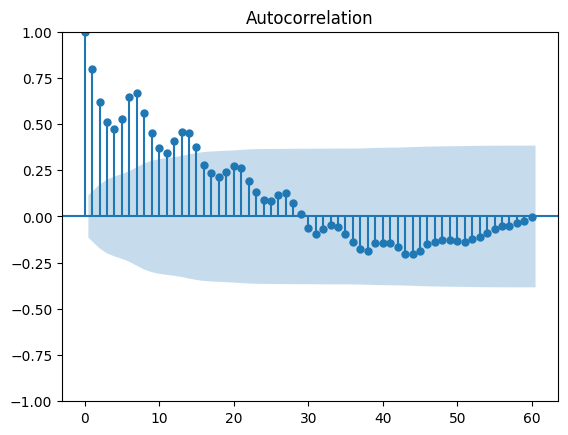

In [64]:
plot_acf(df_receita_site['receita_site'], lags=60)
plt.show()

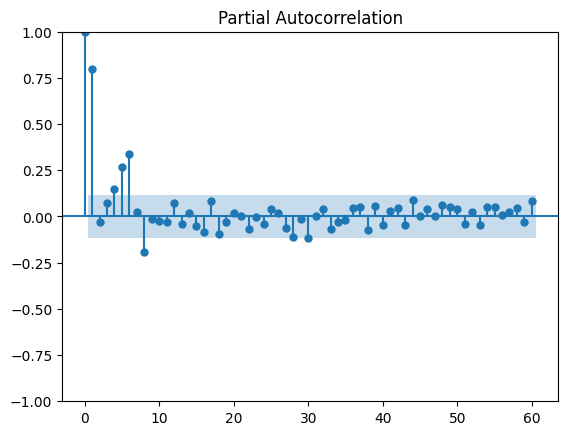

In [65]:
plot_pacf(df_receita_site['receita_site'], lags=60)
plt.show()

# **APLICAÇÃO DO MODELO**

In [84]:
from statsmodels.tsa.arima.model import ARIMA
# Ajustando o modelo ARIMA com os dados de treinamento
modelo_site = ARIMA(df_receita_site['receita_site'], order=(1, 1, 1))
modelo_treinado_site = modelo_site.fit()

#Previsão dos próximos 6 meses a partir de junho
'''ultima_data_site = pd.to_datetime(df_receita_site['data'].max())
data_inicial_site= ultima_data_site + pd.DateOffset(months=1)
indices_site = pd.date_range(start=data_inicial_site, periods=6, freq='MS')
previsao_site = modelo_treinado_site.get_forecast(steps=6)'''


"ultima_data_site = pd.to_datetime(df_receita_site['data'].max())\ndata_inicial_site= ultima_data_site + pd.DateOffset(months=1)\nindices_site = pd.date_range(start=data_inicial_site, periods=6, freq='MS')\nprevisao_site = modelo_treinado_site.get_forecast(steps=6)"

In [130]:
# Número de meses para previsao
num_meses = 6

# Ajustando o modelo ARIMA com os dados de treinamento
modelo_site = ARIMA(df_receita_site['receita_site'], order=(1, 1, 1))
modelo_treinado_site = modelo_site.fit()


previsao_receita_site = modelo_treinado_site.get_forecast(steps=num_meses)
valores_previstos_site = previsao_receita_site.predicted_mean

# Obtendo os intervalos de confiança
intervalos_confianca_site = previsao_receita_site.conf_int()

In [131]:
print("Previsão para os Próximos 12 Meses:")
print(valores_previstos_site)

print("\nIntervalos de Confiança:")
print(intervalos_confianca_site)

Previsão para os Próximos 12 Meses:
293    1.565560e+06
294    1.545349e+06
295    1.534031e+06
296    1.527693e+06
297    1.524143e+06
298    1.522156e+06
Name: predicted_mean, dtype: float64

Intervalos de Confiança:
     lower receita_site  upper receita_site
293       673929.057015        2.457191e+06
294       460134.322538        2.630564e+06
295       353102.983894        2.714960e+06
296       287100.026957        2.768286e+06
297       239854.446955        2.808432e+06
298       202076.609096        2.842235e+06


In [132]:
# Obtendo os valores previstos e os intervalos de confiança
valores_previstos_site = previsao_receita_site.predicted_mean
intervalo_inferior_site = previsao_receita_site.conf_int()['lower receita_site']
intervalo_superior_site = previsao_receita_site.conf_int()['upper receita_site']

In [133]:
previsao_receita_site.predicted_mean

293    1.565560e+06
294    1.545349e+06
295    1.534031e+06
296    1.527693e+06
297    1.524143e+06
298    1.522156e+06
Name: predicted_mean, dtype: float64

In [134]:
# Criando DataFrame com os resultados da previsão
df_previsao_receita_site = pd.DataFrame({
    'Data': indices_site,
    'Receita Prevista': valores_previstos_site,
    'Intervalo Inferior': intervalo_inferior_site,
    'Intervalo Superior': intervalo_superior_site
})

df_previsao_receita_site

,Data,Receita Prevista,Intervalo Inferior,Intervalo Superior
293,2020-11-01,1.565560e+06,673929.057015,2.457191e+06
294,2020-12-01,1.545349e+06,460134.322538,2.630564e+06
295,2021-01-01,1.534031e+06,353102.983894,2.714960e+06
296,2021-02-01,1.527693e+06,287100.026957,2.768286e+06
297,2021-03-01,1.524143e+06,239854.446955,2.808432e+06
298,2021-04-01,1.522156e+06,202076.609096,2.842235e+06


In [135]:
df_previsao_receita_site['Receita Prevista'].mean()

1536488.7921526881

In [136]:
df_receita_site['receita_site'].mean()

1868409.1292487993

In [137]:
df_previsao_receita_site['Data'] = pd.to_datetime(df_previsao_receita_site['Data'])

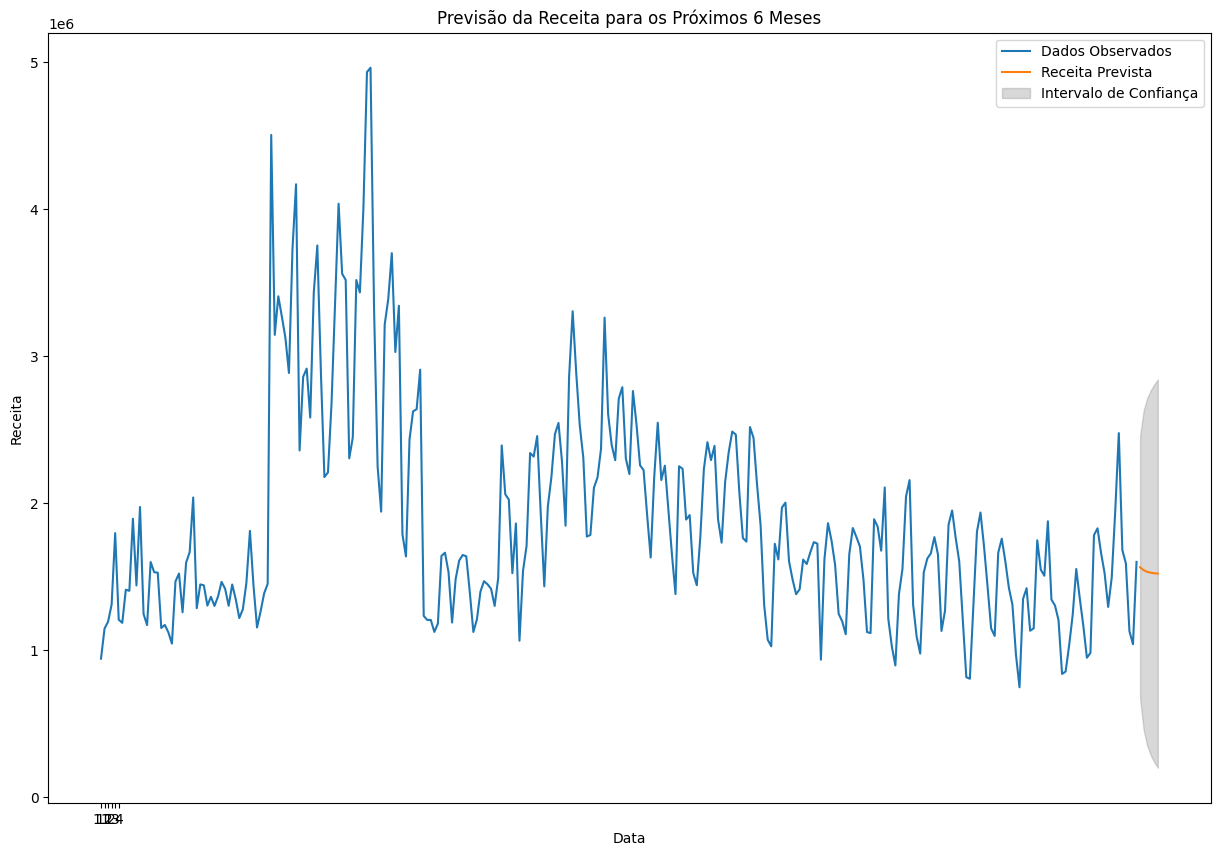

In [139]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(df_receita_site['data'], df_receita_site['receita_site'], label='Dados Observados')
df_previsao_receita_site['Data'] = pd.to_datetime(df_previsao_receita_site['Data'])
plt.plot(df_previsao_receita_site['Data'].astype(str), df_previsao_receita_site['Receita Prevista'], label='Receita Prevista')
plt.fill_between(df_previsao_receita_site['Data'].astype(str), df_previsao_receita_site['Intervalo Inferior'], df_previsao_receita_site['Intervalo Superior'],
                 color='gray', alpha=0.3, label='Intervalo de Confiança')
plt.xlabel('Data')
plt.ylabel('Receita')
plt.title('Previsão da Receita para os Próximos 6 Meses')
plt.legend()

# Obtendo os índices dos meses
meses = df_previsao_receita_site['Data'].dt.month

# Definindo os ticks e labels
plt.gca().set_xticks(range(len(meses)))
plt.gca().set_xticklabels(meses)

plt.show()

# AVALIANDO O MODELO DA RECEITA DO SITE

In [119]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [120]:
# Criando regressão linear com California Housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

modelo = LinearRegression()


scores = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error') # validação cruzada com 5 folds
mse_scores = -scores

std_mse = mse_scores.std()  # Calcula o desvio padrão dos erros quadráticos médios

mean_mse = mse_scores.mean() # Calcula a média e o desvio padrão dos erros quadráticos médios

In [121]:
print("Erros Quadráticos Médios:")
print(mse_scores)
print("Média do Erro Quadrático Médio:", mean_mse)
print("Desvio Padrão do Erro Quadrático Médio:", std_mse)

Erros Quadráticos Médios:
[0.48485857 0.62249739 0.64621047 0.5431996  0.49468484]
Média do Erro Quadrático Médio: 0.5582901717686546
Desvio Padrão do Erro Quadrático Médio: 0.06560199778318038


**PREVISÃO RECEITA BLOG**

In [140]:
resultado_adf_blog = adfuller(df_receita_blog['receita_blog'])# Aplicando o teste ADF

# Extraindo os resultados
estatistica_teste_blog = resultado_adf_blog[0]
valor_p_blog = resultado_adf_blog[1]
valores_criticos_blog = resultado_adf_blog[4]

print('Estatística do teste ADF:', estatistica_teste_blog)
print('Valor-p:', valor_p_blog)
print('Valores críticos:')
for chave, valor in valores_criticos_blog.items():
    print('\t', chave, ':', valor)

Estatística do teste ADF: -5.912604664801903
Valor-p: 2.617356536075473e-07
Valores críticos:
	 1% : -3.4912451337340342
	 5% : -2.8881954545454547
	 10% : -2.5809876033057852


In [141]:
# Verificando se a série é estacionária ou não
if valor_p_blog < 0.05:
    print('A série é estacionária')
else:
    print('A série não é estacionária')

A série é estacionária


In [142]:
df_receita_blog['receita_blog'] = pd.to_numeric(df_receita_blog['receita_blog'])# Convertendo a coluna 'receita' para tipo numérico

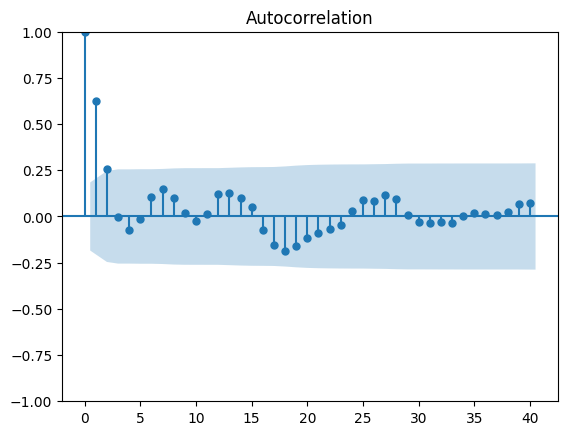

In [143]:
plot_acf(df_receita_blog['receita_blog'], lags=40)
plt.show()

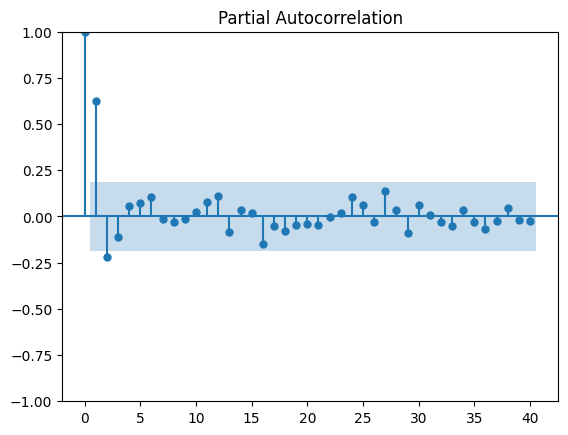

In [144]:
plot_pacf(df_receita_blog['receita_blog'], lags=40)
plt.show()

In [145]:
from statsmodels.tsa.arima.model import ARIMA
# Ajustando modelo ARIMA com os dados de treinamento
modelo_blog = ARIMA(df_receita_blog['receita_blog'], order=(1, 1, 1))
modelo_treinado_blog = modelo_blog.fit()

# Previsão dos próximos 6 meses a partir de junho
ultima_data_blog = pd.to_datetime(df_receita_blog['data'].max())
data_inicial = ultima_data_blog + pd.DateOffset(months=1)
indices_blog = pd.date_range(start=data_inicial, periods=6, freq='MS')
previsao_blog = modelo_treinado_blog.get_forecast(steps=6)

In [146]:
# Valores previstos e os intervalos de confiança
valores_previstos_blog = previsao_blog.predicted_mean
intervalo_inferior_blog = previsao_blog.conf_int()['lower receita_blog']
intervalo_superior_blog = previsao_blog.conf_int()['upper receita_blog']

In [147]:
# Criando um DataFrame com os resultados da previsão
df_previsao_receita_blog = pd.DataFrame({
    'Data': indices_blog,
    'Receita Prevista blog': valores_previstos_blog,
    'Intervalo Inferior blog': intervalo_inferior_blog,
    'Intervalo Superior blog': intervalo_superior_blog
})


df_previsao_receita_blog

,Data,Receita Prevista blog,Intervalo Inferior blog,Intervalo Superior blog
113,2020-11-01,1.945817e+06,1.261701e+06,2.629934e+06
114,2020-12-01,1.931577e+06,9.331984e+05,2.929956e+06
115,2021-01-01,1.935554e+06,7.074769e+05,3.163631e+06
116,2021-02-01,1.934443e+06,5.116302e+05,3.357257e+06
117,2021-03-01,1.934754e+06,3.412430e+05,3.528264e+06
118,2021-04-01,1.934667e+06,1.869456e+05,3.682388e+06


In [151]:
df_receita_blog['receita_blog'].mean()

1329909.9957252168

In [153]:
df_previsao_receita_blog['Receita Prevista blog'].mean()

1936135.4639244229

In [170]:
media_receita_blog = 1329909.9957252168

# Média da receita prevista
media_receita_prevista = 1936135.4639244229

# Calcular o percentual de crescimento
percentual_crescimento = ((media_receita_prevista - media_receita_blog) / media_receita_blog) * 100

# Exibir o resultado
print(f"Percentual de Crescimento da Receita: {percentual_crescimento:.2f}%")

Percentual de Crescimento da Receita: 45.58%


In [157]:
df_previsao_receita_blog['Data'] = pd.to_datetime(df_previsao_receita_blog['Data'])

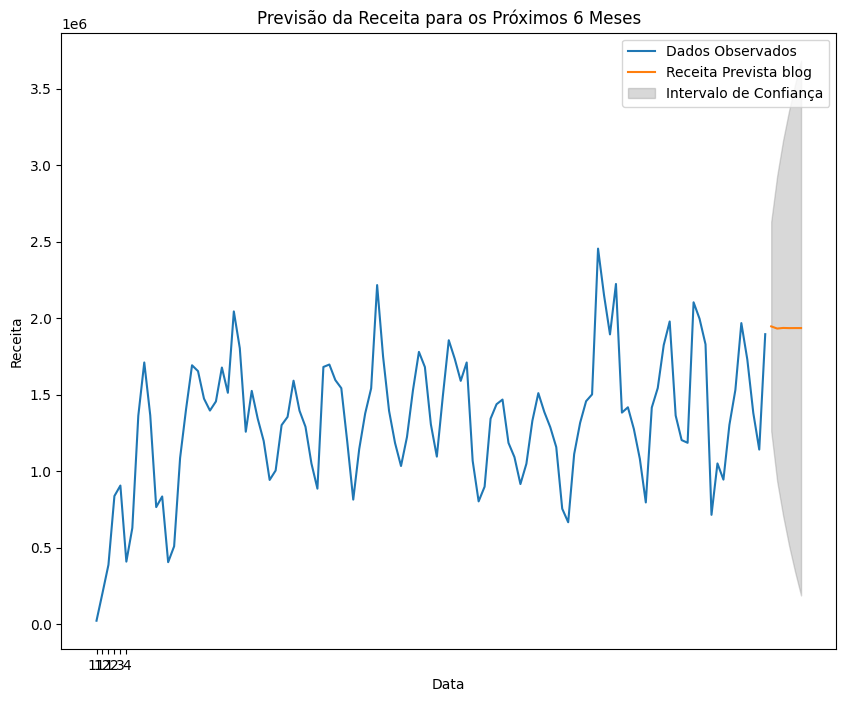

In [173]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(df_receita_blog['data'], df_receita_blog['receita_blog'], label='Dados Observados')
df_previsao_receita_blog['Data'] = pd.to_datetime(df_previsao_receita_blog['Data'])
plt.plot(df_previsao_receita_blog['Data'].astype(str), df_previsao_receita_blog['Receita Prevista blog'], label='Receita Prevista blog')
plt.fill_between(df_previsao_receita_blog['Data'].astype(str), df_previsao_receita_blog['Intervalo Inferior blog'], df_previsao_receita_blog['Intervalo Superior blog'],
                 color='gray', alpha=0.3, label='Intervalo de Confiança')
plt.xlabel('Data')
plt.ylabel('Receita')
plt.title('Previsão da Receita para os Próximos 6 Meses')
plt.legend()

# Obtendo os índices dos meses
meses = df_previsao_receita_blog['Data'].dt.month

# Definindo os ticks e labels dos meses
plt.gca().set_xticks(range(len(meses)))
plt.gca().set_xticklabels(meses)

plt.show()